# Project Team Members:
   **Andres Baez, acbaez@ucsd.edu, A92112700**
   
   **Catherine Kim, cyk020@ucsd.edu, A12598619**
   
   **Eric Richards, eorichar@ucsd.edu, A12724500**
   
   **Ronald Tun, Rtun@ucsd.edu, A12458764 **
   
   **Janica Kann, jkann@ucsd.edu, A13734650**
   
   **Myung Sun Kim, msk024@ucsd.edu, A12870165 **

# 1. Introduction and Background:

Yelp is a mobile app and desktop website that allows users to view restaurants and services based on ratings, location, and price. Users can also see pictures of food, menu, and the general space. In addition, users can leave reviews on Yelp to help other users decide on using that particular service/restaurant. For users that Yelp deems as “cultural ambassadors” to a city, they receive the title of “Elite.” For this project, we are focusing on how “Elite” members of Yelp leave reviews.

From personal experience using Yelp, we have noticed that users tend to leave more opinionated reviews as they gain more experience reviewing restaurants. Through this observation, we became curious if users leave more “critical” reviews if they are Elite members. The question became more relevant to us after seeing how Yelp has made its data publicly available for student projects, guaranteeing that we would have a quality dataset to work with. In the context of this project, we define the word “critical” as users leaving more reviews with a negative connotation. With this background, we formed the following research question and hypothesis.


**Research Question:** Are Yelp users more critical in their reviews when they have an “Elite” title verses when they don’t?

**Hypothesis:**  When a user is an Elite member, their reviews will be more critical compared to when they are not an Elite member.

# Member Contributions

Our team consists of six members. All of our members worked on finalizing the topic, research question, hypothesis, and defining the methods for data cleaning, visualization, and analysis. Specifically: 

**Andres** took the lead on writing the methods for...

**Ronald** took the lead on writing the methods for...

**Janica** took the lead on researching the ethics and privacy information behind the data, and coming up with any issue that can arise from these.

**Eric** took the lead on analyzing the data and drawing a conclusion about our hypothesis as well as writing a discussion on our results. 

**Catherine** took the lead on writing the introduction/background and descriptions for the methods in data cleaning, data visualization, data analysis, and results.

**Myung** took the lead on writing the introduction/background and descriptions for the methods in data cleaning, data visualization, data analysis, and results.


# Privacy and Ethics Considerations

According to Yelp, we’re able to use the dataset, as long as it is for academic purposes. The only privacy concerns or terms of use are that if the project were to be published, our project is not able to disclose the contents of the dataset. In terms of biases, our data was taken from two countries and ten metropolitan areas, so our dataset is pretty diverse, and not exclude certain populations. As for issues, since our dataset includes yelp users who have reviewed locations within the ten metropolitan cities, if someone were to obtain our data, they could identify someone’s user ID and first name, and be able to track multiple locations that a person has frequented within a city. To prevent this issue, we dropped the columns that included the first name of the yelp reviewers and their locations within our dataset.


# 0. Imports That Allow Our Project to Work: 

In [1]:
#import necessary packages
import json
import pandas as pd
import numpy as np
from textblob import TextBlob
import time
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# 1. Data Description:

Dataset #1 

Dataset Name: review.json

Link to the dataset: https://www.yelp.com/dataset

Number of observations: 6,685,900
Dataset #2 

Dataset Name: user.json

Link to the dataset: https://www.yelp.com/dataset

Number of observations: 1,637,138 users

The datasets we will be analyzing to answer our hypothesis are a part of Yelp’s larger academic dataset that includes (among other data) 6,685,900 reviews, 192,609 businesses, and 1,637,138 user profiles across 2 countries and 10 metropolitan areas. Within the academic dataset are 6 .json files. We will be using 2 (review.json, user.json) files for this project. They contain full review text data including the user_id that wrote the review and the business_id the review is written for, as well as user data such as the user's friend mapping and associated metadata.


# 2. Data Cleaning/Pre-Processing:

Within Yelp’s academic dataset are 6 .json files, we will be using 2 (review.json, user.json) files for this project. They contain full review text data including the user_id that wrote the review and the business_id the review is written for, as well as user data such as the user's friend mapping and associated metadata.
We combined user.json and review.json by matching the 22 character unique user id for each review in review.json to the same 22 character user id in user.json. This will match a review (a text string) to the corresponding user profile data (including whether they are an elite user) available in user.json.

We cleaned this, this, and this from this dataset. We utilized this, this, and this from this dataset. 
We’re looking to see if there is a relationship between the time a user becomes an elite member to how they leave more critical reviews after this status change. We’ll be comparing how the user left reviews prior to becoming an elite member to how the user leaves reviews after the user becomes an Elite member to see if there is a difference.


In [2]:
#Read in both data frames
#Set filename and read through review JSON file line by line
if False:
    filename_review = "/Users/andresbaez/Desktop/COGS108_Project/yelp_dataset/review.json"
    #Create dataframe that will contain review data
    df_review = pd.DataFrame()
    #go through each JSON object and create a dictionary out of its key-value pairs
    st = time.time()
    with open(filename_review,'r') as f:
        for line in f:
            data = json.loads(line)
            #append each JSON object to df_review
            df_review = df_review.append(data, ignore_index=True)       
            if (time.time() - st) > 60:
                break
    df_review.to_csv("/Users/andresbaez/Desktop/COGS108_Project/yelp_dataset/review.csv")
    #Set filename and read through user JSON file line by line
    filename_users = "/Users/andresbaez/Desktop/COGS108_Project/yelp_dataset/user.json"
    #Create dataframe that will contain user data
    df_users = pd.DataFrame()
    #go through each JSON object and create a dictionary out of its key-value pairs
    st = time.time()
    with open(filename_users,'r') as f:
        for line in f:
            data = json.loads(line)
            #append each JSON object to df_users
            df_users = df_users.append(data, ignore_index=True)
            if (time.time() - st) > 60:
                break
    df_users.to_csv("/Users/andresbaez/Desktop/COGS108_Project/yelp_dataset/user.csv")

**Previewing Our Data:** In this section of code below, we are reading in the csv file and previewing the datasets.

In [3]:
#Read newly exported CSV files into dataframe
df_review = pd.read_csv('./yelp_dataset/review2.csv')
df_user = pd.read_csv('./yelp_dataset/user.csv')

#Preview DataFrames
df_review.head(10)

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,ujmEBvifdJM6h6RLv4wQIg,0.0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA
1,1,NZnhc2sEQy3RmzKTZnqtwQ,0.0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0.0,yXQM5uF2jS6es16SJzNHfg
2,2,WTqjgwHlXbSFevF32_DJVw,0.0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3.0,n6-Gk65cPZL6Uz8qRm3NYw
3,3,ikCg8xy5JIg_NGPx-MSIDA,0.0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0.0,dacAIZ6fTM6mqwW5uxkskg
4,4,b1b1eb3uo-w561D0ZfCEiQ,0.0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ
5,5,eU_713ec6fTGNO4BegRaww,0.0,2013-01-20 13:25:59,0.0,fdiNeiN_hoCxCMy2wTRW9g,4.0,I'll be the first to admit that I was not exci...,0.0,w31MKYsNFMrjhWxxAb5wIw
6,6,3fw2X5bZYeW9xCz_zGhOHg,5.0,2016-05-07 01:21:02,4.0,G7XHMxG0bx9oBJNECG4IFg,3.0,Tracy dessert had a big name in Hong Kong and ...,5.0,jlu4CztcSxrKx56ba1a5AQ
7,7,zvO-PJCpNk4fgAVUnExYAA,1.0,2010-10-05 19:12:35,1.0,8e9HxxLjjqc9ez5ezzN7iQ,1.0,This place has gone down hill. Clearly they h...,3.0,d6xvYpyzcfbF_AZ8vMB7QA
8,8,b2jN2mm9Wf3RcrZCgfo1cg,0.0,2015-01-18 14:04:18,0.0,qrffudO73zsslZbe8B9D3Q,2.0,I was really looking forward to visiting after...,1.0,sG_h0dIzTKWa3Q6fmb4u-g
9,9,oxwGyA17NL6c5t1Etg5WgQ,1.0,2012-02-29 21:52:43,0.0,RS_GTIT6836bCaPy637kNQ,3.0,It's a giant Best Buy with 66 registers. I do...,1.0,nMeCE5-xsdleyxYuNZ_7rA


**Dropping Columns:** From the review dataframe, we dropped the following columns: business_id, cool, funny, useful. From the user dataframe, we dropped the following columns: friends, compliment_cool, compliment_cute, compliment_funny, compliment_hot, compliment_list, compliment_more, compliment_note, compliment_photos, compliment_writer, compliment_plain, compliment_profile, cool, fans, funny, name, useful.

In [4]:
#Start out by dropping columns that are not necessary to our analysis
df_review.drop(['business_id','cool','funny','useful'],axis=1,inplace=True)
df_user.drop(['friends','compliment_cool','compliment_cute','compliment_funny','compliment_hot','compliment_list',
              'compliment_more','compliment_note','compliment_photos','compliment_writer','compliment_plain','compliment_profile',
              'cool','fans','funny','name','useful','yelping_since'],axis=1,inplace=True)

**Functions for data cleaning:** The getYear function grabs the year from the data column. 
The find_sentiment function makes a sentiment index that gives a polarity rating (-1, 1). 1 being very positive and -1 being very negative. We then convert this rating to the 1-5 review rating that Yelp users use when rating places. After that, we averaged this converted polarity rating with the original 1-5 star rating to make an overall score that measures the sentiment in a review. 
The Elite function returns 1 if the review made was during the same year the user became Elite. 
The convert_string_to_list function charges the giant string of what year a user became an Elite member into a list of integers.

In [5]:
#Want to parse out year from date (YEAR-DAY-MONTH)
def getYear(date):
    year = date.split("-")[0]
    return int(year)

#assumes stars is int and reviewText is string
def find_sentiment(stars, reviewText):
    #pass in corpus to textblob obj
    review = TextBlob(reviewText)
    
    #convert review sentiment from [-1,1] to [0,5]
    reviewScore = (review.sentiment[0] + 1) / 2
    reviewScore = reviewScore * 5
    
    #return average of scores
    score = (stars + reviewScore) / 2
    return score
    
def Elite(row):
    #return a 1.0 if the review was written in a year featured in the
    #list of years the user was an elite member
    if row['date'] in row['elite']:
        return 1
    else: return 0
        
    
def convert_string_to_list(elite):
    #Cast passed in text to a string
    elite = str(elite)
    if elite == "NaN" or elite == 'nan':
        return
    #Strip any whitespace on either side of string
    elite.strip()
    #Replace commas w spaces
    elite_list = elite.split(',')    
    out = []
    #Append each substring separated w spaces 
    #as an item in our return list
    for item in elite_list:
        out.append(int(item))
    return list(out)

We continued cleaning data by applying functions that will make the numerical operations and other logical operations on data easier (e.g averaging, checking for list membership, creating indicator for overall sentiment.) Here we define sentiment on a scale of 1-5, with 1 being very negative and 5 being very positive

In [6]:
#Want to convert string values to int before dropping nulls
df_user['elite'] = df_user['elite'].apply(convert_string_to_list)

#Want to drop any columns where the user has never been an elite member
df_user.dropna(subset =['elite'],inplace=True)

#Apply function to obtain year from date in both dataframes
df_review['date'] = df_review['date'].apply(getYear)

#Want to merge our user and review data now that we've dropped unnecessary rows and columns
df = pd.merge(df_user,df_review,on='user_id',how='right')

#Drop all rows with users who have never been an elite user
df.dropna(subset =['elite'],inplace=True)

#Apply function to find if reviewer was elite at the time of their review
df['Elite_Reviewer'] = df.apply(lambda row: Elite(row), axis=1)

#Apply function to find sentiment for each review in df_review
df['critical_index'] = df.apply(lambda row: find_sentiment(row['stars'], row['text']), axis=1)

Now that we've cleaned the data and prepared it for the anaylses we want to conduct, we can preview it and get an idea of what sentiments we see ocurring more frequently than others

In [7]:
df.head(20)

,Unnamed: 0_x,average_stars,elite,review_count,user_id,Unnamed: 0_y,date,review_id,stars,text,Elite_Reviewer,critical_index
0,4.0,4.08,"[2015, 2016, 2017, 2018]",361.0,MM4RJAeH6yuaN8oZDSt0RA,10232,2017,dLOTJm1mZA1cErGSSK_N7w,3.0,"So, Mom and Dad live in Sun City and this rest...",1,3.074675
1,27.0,4.16,"[2016, 2017]",167.0,djQLJTLA4Tx7TpzYCKIqJQ,10857,2014,cJ0Zfj6jqSDtiLondkMfWw,5.0,"Cheap, clean, well maintained and good service...",0,4.291667
2,39.0,3.64,"[2016, 2017, 2018]",318.0,AsYMm_O4H-mwmWbmeACDHw,7161,2015,khzlXZYDJ_lHyrxMAxnQWg,5.0,"Excellent resort, we had a great view on the 2...",0,4.186232
3,89.0,3.80,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...",1090.0,Ar3bat-NGasrXDiS7WF8OA,10341,2016,h4Fr7P2sPWo0Q81Lw-xohQ,4.0,Solid 4 Stars...When leaving the establishment...,1,3.689360
4,106.0,4.30,"[2012, 2013, 2014, 2016, 2017, 2018]",398.0,i_EASSNcEqc1JrfdBjBeVw,15264,2013,VMaX2uXSEX3g9NvnoDM_aA,4.0,"I went for lunch with a friend, since she had ...",1,3.586310
5,123.0,3.74,"[2008, 2009, 2010, 2011, 2012]",198.0,kCVPl2RumlSgSDx9PMfXDA,12677,2008,-oLbiwBLCtQyvNYlDq6NBA,2.0,"Well I wouldn't really call this place a ""cock...",1,2.564525
6,135.0,4.09,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",403.0,T8LqkYbwMPZmvXSsUfN8sQ,13772,2008,Qzk4RACFPoFE9ciKWdxeXQ,5.0,I miss this place. I used to frequent it for ...,0,4.062500
7,136.0,3.96,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...",659.0,yH3Jyu5vRTAJ8uMAD2bLGQ,11863,2010,oyTSCbO3VYMuEXt29h8H_w,4.0,WOW...that was my expression we i spotted this...,1,3.359993
8,180.0,4.04,"[2015, 2016]",481.0,LNPyE5X1K5B_flcTCH9StQ,5127,2017,o2QISTyU8ylIcVMeUQX4QQ,4.0,Who doesn't like making their own dessert?!?\n...,0,3.768694
9,186.0,3.70,"[2010, 2011, 2012, 2013, 2014, 2015]",711.0,0cyp4yH4XUkOKcQuP3_G7A,15178,2013,37A9ZFjxJB-diFAUU5Xlgw,5.0,"Best $2 you'll spend in Nevada, unless of cour...",1,3.779321


# 3. Data Visualization:

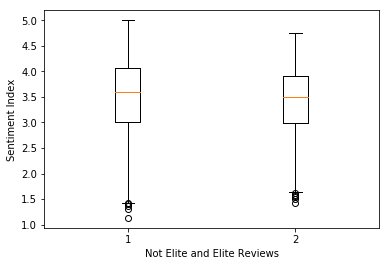

3.388601360603814
3.424377899577682


In [8]:
#create and label boxplot
elite_reviews = df.loc[df['Elite_Reviewer'] == True]['critical_index']
reviews = df.loc[df['Elite_Reviewer'] == False]['critical_index']

data = [reviews, elite_reviews]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('Not Elite and Elite Reviews')
ax.set_ylabel('Sentiment Index')

plt.show()

#calculate average sentiment among reviews
elite_sentiment = np.mean(elite_reviews)
not_elite_sentiment = np.mean(reviews)

print(elite_sentiment)
print(not_elite_sentiment)

# 4. Data Analysis and Results:

In [9]:
#Function fits a curve through plotted data points 
res_1 = smf.glm("Elite_Reviewer ~ critical_index", data = df, family=sm.families.Binomial()).fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Elite_Reviewer   No. Observations:                  790
Model:                            GLM   Df Residuals:                      788
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.80
Date:                Thu, 21 Mar 2019   Deviance:                       767.60
Time:                        12:16:37   Pearson chi2:                     790.
No. Iterations:                     4   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7223      0.475      3.626      0.000       0.791       2.653
critical_index    -0.0797      0.136     -0.584      0.559      -0.347       0.188
==================================================================================
"""

# 5. Conclusions and Discussion:

After visualizing and analyzing our data, we conclude that there is not sufficient evidence to indicate that there is a relationship between Elite status and sentiment. As such, we fail to reject the null hypothesis that there is no relationship between the two variables in question. Our initial intuition that being an Elite member would correlate with leaving more critical reviews was not statistically significant because the likelihood of observing a coefficient of -0.0797 when there is in fact no relationship between Elite status and sentiment is higher than our alpha level of .05. Furthermore, the distribution of sentiments among Elite reviews and non Elite reviews from the users analyzed are very similar, meaning that the “Elite” status can not be used as an indicator of writing more critical reviews. 

As a result of the data we used and the processes we did not complete, there are several confounds in our work. In our methods, we analyzed all Yelp users who have ever been Elite and compared their reviews from before they were Elite and after they were Elite. We did not analyze the broader set of Yelp users who have never been given the Elite title. Because of this, it may be that users who were given the Elite title at one point tend to give more critical reviews than other Yelp reviewers. Furthermore, the Yelp academic dataset that we pulled our two datasets from does not include user data from all the countrie Yelp is available, meaning that there may be relevant Elite data that we could have analyzed, but did not have access to. 

In the future, our team can compare users who have been given the Elite title at some point to the broader pool of Yelp users and their reviews. This will allow us to solidify our conclusion that the Elite title does correlate with the sentiment of a review. Similarly, we can analyze the sentiment of the “average” Yelp review for a geographical region or area which may provide valuable information to businesses which rely on Yelp to bring in new customers. 
